<a href="https://colab.research.google.com/github/krmiddlebrook/intro_to_deep_learning/blob/master/machine_learning/lesson%201%20-%20linear%20regression/examples/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression
<figure>
<img src='https://media.makeameme.org/created/brace-yourself-regression-599599.jpg' width='50%' height='50%'></img>
</figure>


Perhaps the most natural machine learning task to wrap our heads around is *regression*--a set of methods for modeling the relationship between one or more independent variables (i.e., $x$) and a dependent variable (i.e., $y$). Regression problems pop up whenever we want to output a *numeric* value. 

Most applications of regression fall into one of the following two broad categories:
- *inference* - to explain the relationship between the inputs and outputs (most common).
- *prediction* - to predict numeric outputs given inputs (most common in machine learning). 

A few everyday examples of regression include predicting prices (of homes, stocks, etc.), predicting length of stay (for patients in the hospital), and demand forecasting (for retail sales).

## Linear Regression
*Linear regression* is probably the simplest and most popular regression method. It is called "linear" regression because we **assume** that the relationship between the independent variables $x$ (called *features*) and the dependent variable  $y$ (called *labels*) is linear--that is, $y$ can be expressed as a *weighted sum* of the elements in $x$, plus some *noise* in the data. In mathematical terms this can be expressed as: 
$$
y = wx + b
$$

where $w$ represents the learnable *weights* and $b$ the *bias* (i.e., you may recognize it as the *intercept*). The weights determine the influence of each feature on the prediction and the bias tells us what the predicted value would be if all the features $x$ values were 0. At a high level, the goal of linear regression is to find the weight estimates and the bias term $b$ that *minimize* the error between the predictions ($\hat{y}$, $\hat{}$ pronounced "hat") and the real labels ($y$).


Adam's Addition:

**The real labels ($y$) and predicted labels($\hat{y}$) are continuous, so it can be any real number. Real numbers are any numbers, including those with decimals.**

## Linear Model


To make the above linear regression formula more concrete, let's translate it to an example. We have acquired a dataset on world happiness. Specifically, we have the [World Happiness dataset](https://www.kaggle.com/unsdsn/world-happiness), which contains the statistics and happiness scores of approximately 150 countries around the globe. We want to construct a single-variable linear model to predict happiness scores using the GDP per capita feature column. The linear regression equation for the model can be expressed as:  
$$
\hat{\text{score}} = w_{\text{area}} x_{\text{GDP per capita}} + b 
$$
where $w_{\text{area}}$ is the learnable *weight* and $b$ is the *bias* (or *intercept*) and $x$ is the value of the GDP per capita for an individual sample. 

The goal is to choose the weight  $w$  and the bias  b  such that on average, the predictions made according to our model *best fit* the true prices observed in the data.

# Linear Regression: What makes us happy?

That's the question we'll try to answer in this notebook. But how? The first step is to find a dataset related to our question. The World Happiness (https://www.kaggle.com/unsdsn/world-happiness) dataset happens to be a great option so we'll us it here. The dataset contains information about the state of global happiness with happiness scores and rankings for almost every country on earth. Pretty cool right!

We want to find out what makes us happy. We will use sinlge-variable linear regression to answer this question. In general, when you use any data science method (like linear regression) you'll want to do a few things:

1. Explore and visualize the dataset
2. Prepare the data for the model
3. Build the model
4. Train the model
5. Evaluate the model
6. Draw conclusions

We'll start our analysis by exploring the World Happiness dataset.

In [ ]:
# import the libraries we be need
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Adam's Contribution
from sklearn.model_selection import train_test_split

## 1. Explore the dataset

In [ ]:
# load the dataset into a dataframe
data_url = 'https://raw.githubusercontent.com/krmiddlebrook/intro_to_deep_learning/master/datasets/world-happiness/2019.csv'
happy2019 = pd.read_csv(data_url)
happy2019.head() # view the first 5 rows of the data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
# how many rows and columns are in the dataset
happy2019.shape # looks like 156 rows (samples) and 9 columns (features)

(156, 9)

## 2. Prepare the data for the model
To prepare the dataset for a linear model (or any model really), we need to complete several tasks:
1. Define the features ($x$) and labels ($y$) variables
2. Split the dataset into a *training* set and a *test* set.
3. Separate the features and the labels in the training/test sets.


In [ ]:
# define the x and y variables 
x_col = 'GDP per capita'
y_col = 'Score'

# split the dataset into a training set and a test set.
# we will use the test set in the final evaluation of our model.
train = happy2019.sample(frac=0.8, random_state=0)
test = happy2019.drop(train.index)

# separate the x (features) and y (labels) in the train/test datasets
train_features = train[x_col].values.reshape(-1, 1)
test_features = test[x_col].values.reshape(-1, 1)

train_labels = train[y_col].values.reshape(-1, 1)
test_labels = test[y_col].values.reshape(-1, 1)

# Easier Data Separation
#features = happy2019[x_col].values.reshape(-1, 1)
#labels = happy2019[y_col].values.reshape(-1, 1)
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, train_size=0.8)


print('train features shape:', train_features.shape)
print('train labels shape:', train_labels.shape)

print('test features shape:', test_features.shape)
print('test labels shape:', test_labels.shape)

print('first 5 test labels:\n', test_labels[:5])

train features shape: (125, 1)
train labels shape: (125, 1)
test features shape: (31, 1)
test labels shape: (31, 1)
first 5 test labels:
 [[7.246]
 [6.726]
 [6.444]
 [6.354]
 [6.3  ]]


The above code returns a *training* and *test* dataset. The GDP per capita variable represents the features data and the happiness Score represents the labels. The train_features and train_labels arrays represent the features and labels of the training dataset, each containing 125 rows and 1 column. The test_features and test_labels arrays represent the features and labels of the test dataset, each containing 31 rows and 1 column.

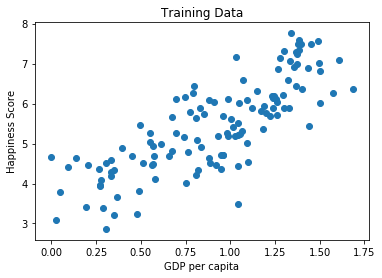

In [ ]:
plt.scatter(x=train_features, y=train_labels)
plt.title('Training Data')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

Here is our training data. What Linear Regression does is that it will find the best line that goes through the middle of our training data. The best line will also compute the least training loss, which we will explain later.

## 3. Build the model
Now that we have prepared the data, it's time to build a model! 

Coding linear regression from scratch can be tedious, fortunately, the `Sklearn` library comes with a built in package in the `sklearn.linear_model` module under the `LinearRegression` class that makes building linear regression models a breeze. We'll use this class to build our linear regression model to predict the happiness Score ($y$) given the GDP per capita ($x$).    


In [ ]:
# build the LinearRegression model object 
model = LinearRegression(fit_intercept=True)

## 4. Train the model
Now that we have a linear model (that was easy), we need to *train* it using the training dataset. We will use the `fit` method to "fit" the model to the data (i.e., train the model).




In [ ]:
# fit the model with the training set train_features (x) and train_labels (y) data  
model.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that we've trained the model, let's see what it's  *mean absolute error*  is on the training dataset. We use the `predict` method to make predictions given a dataset of features.

In [ ]:
train_predictions = model.predict(train_features)

mae = metrics.mean_absolute_error(train_labels, train_predictions)
print('training set mean absolute error: ', round(mae, 4))

training set mean absolute error:  0.5576


The mean absolute error on the training set was approximately +/- 0.5576. Is this good? We leave that for you to decide.

# 5. Evaluate the model
Now that we've trained the model, it's time to evaluate it on unseen data using the test dataset, which we did not use while training the model. The model preformance on the test set will give us a sense of how well we expect it to predict happiness score given new GDP per capita data. 

In [ ]:
test_predictions = model.predict(test_features)

test_mae = metrics.mean_absolute_error(test_labels, test_predictions)
print('test set mean absolute error: ', round(test_mae, 4))

test set mean absolute error:  0.5152


The average (absolute) error is around +/- 0.5152 units for happiness Score. Is this good? We'll leave that decision up to you. Let's also visualize the prediction and real happiness Score values using the test set samples.

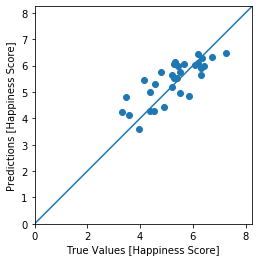

In [ ]:
ax = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Happiness Score]')
plt.ylabel('Predictions [Happiness Score]')
lims = [0, max(test_labels) + 1] # [0, 31]
plt.xlim(lims)
plt.ylim(lims)
# plots line y=x
# We want most points to be close to the line as possible
_ = plt.plot(lims, lims)

It looks like our model predicts reasonably well. Let's take a look at the error distribution.

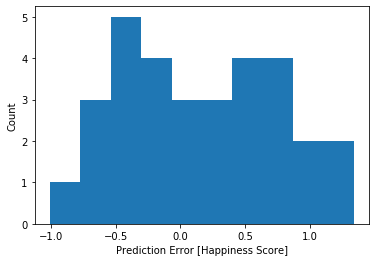

In [ ]:
errors = test_predictions.reshape(-1, 1) - test_labels
plt.hist(errors, bins = 10)
plt.xlabel("Prediction Error [Happiness Score]")
_ = plt.ylabel("Count")

The histogram shows that the errors aren't quite *Normally* distributed (also called *gaussian*), but we might expect that because the number of samples is very small.

![img](https://cdn.kastatic.org/ka-perseus-graphie/191a8f604b04f7b6e4a80d04db881c12798856f7.svg)

Let us now see the best fitted line that the model was able to find.

b: 3.43
w: 2.22


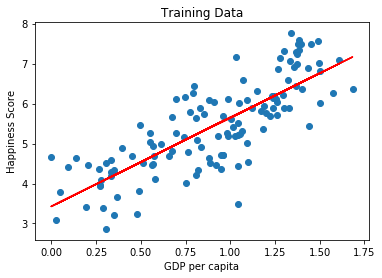

In [ ]:
b = float(model.intercept_[0])
print('b:', round(b,2))
w = float(model.coef_[0][0])
print('w:', round(w,2))

plt.scatter(x=train_features, y=train_labels)
plt.title('Training Data')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
y = [b] + list((w*train_features + b).reshape(-1))
x = [0] + list(train_features.reshape(-1))
plt.plot(x, y, color='r')
plt.show()

## 6. Draw conclusions
We built a single-variable linear regression model to predict happiness Score given a country's GDP per capita. The model achieved an average (absolute) error of about +/- 0.5152. We expect that a more complex model or more data samples or features could lead to better results.

# Summary
In this lesson we introduced linear regression from a single variable (one feature) perspective. We covered several important techniques to handle regression problems including:
- The model estimation function ($y = wx + b$).
- Demonstrated preparing data for a model.
- Used Skleanr to build and train a model.
- Showed how to evaluate a model.